# Preprocessing Workflow


🎯 This exercise will guide you through the preprocessing workflow. Step by step, feature by feature, you will investigate the dataset and take preprocessing decisions accordingly.

🌤 We stored the `ML_Houses_dataset.csv` [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset.csv) in the cloud.

👇 Run the code down below to load the dataset and features you will be working with.

In [252]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [253]:
# Loading the dataset
url = "https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset.csv"
data = pd.read_csv(url)

# Selecting some columns of interest
selected_features = ['GrLivArea',
                     'BedroomAbvGr',
                     'KitchenAbvGr',
                     'OverallCond',
                     'RoofSurface',
                     'GarageFinish',
                     'CentralAir',
                     'ChimneyStyle',
                     'MoSold',
                     'SalePrice']

# Overwriting the "data" variable to keep only the columns of interest
# Notice the .copy() to copy the values
data = data[selected_features].copy()

# Showing the first five rows
data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,ChimneyStyle,MoSold,SalePrice
0,1710,3,1,5,1995.0,RFn,Y,bricks,2,208500
1,1262,3,1,8,874.0,RFn,Y,bricks,5,181500
2,1786,3,1,5,1593.0,RFn,Y,castiron,9,223500
3,1717,3,1,5,2566.0,Unf,Y,castiron,2,140000
4,2198,4,1,5,3130.0,RFn,Y,bricks,12,250000


📚 Take the time to do a ***preliminary investigation*** of the features by reading the ***dataset description*** available [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset_description.txt). Make sure to refer to it throughout the day.

In [254]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1760 entries, 0 to 1759
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GrLivArea     1760 non-null   int64  
 1   BedroomAbvGr  1760 non-null   int64  
 2   KitchenAbvGr  1760 non-null   int64  
 3   OverallCond   1760 non-null   int64  
 4   RoofSurface   1750 non-null   float64
 5   GarageFinish  1667 non-null   object 
 6   CentralAir    1760 non-null   object 
 7   ChimneyStyle  1760 non-null   object 
 8   MoSold        1760 non-null   int64  
 9   SalePrice     1760 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 137.6+ KB


## (1) Duplicates

ℹ️ ***Duplicates in datasets cause data leakage.*** 

👉 It is important to locate and remove duplicates.

❓ How many duplicated rows are there in the dataset ❓

<i>Save your answer under variable name `duplicate_count`.</i>

In [255]:
duplicate_count = data.duplicated().sum()
duplicate_count

300

❓ Remove the duplicates from the dataset. Overwite the dataframe `data`❓

In [256]:
data = data.drop_duplicates()

In [257]:
data.shape

(1460, 10)

🧪 **Test your code**

In [258]:
from nbresult import ChallengeResult

result = ChallengeResult('duplicates',
                         duplicates = duplicate_count,
                         dataset = data
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/branchedelac/.pyenv/versions/3.10.6/envs/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/branchedelac/code/branchedelac/05-ML/02-Prepare-the-dataset/data-preprocessing-workflow/tests
plugins: anyio-3.6.2, asyncio-0.19.0, typeguard-2.13.3
asyncio: mode=strict
collecting ... collected 2 items

test_duplicates.py::TestDuplicates::test_dataset_length PASSED           [ 50%]
test_duplicates.py::TestDuplicates::test_duplicate_count PASSED          [100%]

============================== 2 passed in 0.76s ===============================


💯 You can commit your code:

git add tests/duplicates.pickle

git commit -m 'Completed duplicates step'

git push origin master



## (2) Missing data

❓ Print the percentage of missing values for every column of the dataframe. ❓

In [259]:
# Number of missing values
data.isna().sum().sort_values(ascending=False)

GarageFinish    81
RoofSurface      9
GrLivArea        0
BedroomAbvGr     0
KitchenAbvGr     0
OverallCond      0
CentralAir       0
ChimneyStyle     0
MoSold           0
SalePrice        0
dtype: int64

In [260]:
# Percentage of null values
data.isna().sum().sort_values(ascending=False)/len(data)

GarageFinish    0.055479
RoofSurface     0.006164
GrLivArea       0.000000
BedroomAbvGr    0.000000
KitchenAbvGr    0.000000
OverallCond     0.000000
CentralAir      0.000000
ChimneyStyle    0.000000
MoSold          0.000000
SalePrice       0.000000
dtype: float64

### `GarageFinish`

❓ **Questions** about `GarageFinish` ❓

Investigate the missing values in `GarageFinish`. Then, choose one of the following solutions:

1. Drop the column entirely
2. Impute the column median using `SimpleImputer` from Scikit-Learn
3. Preserve the NaNs and replace them with meaningful values

Make changes effective in the dataframe `data`.


<details>
    <summary>💡 <i>Hint</i></summary>
    
ℹ️ According to the dataset description, the missing values in `GarageFinish` represent a house having no garage. They need to be encoded as such.
</details>

In [261]:
# Since only 5% of the values are null, it doesn't seems wise to drop the column.
# Let's have a look at what the column actually contains.
data["GarageFinish"].value_counts(dropna=False)

Unf    605
RFn    422
Fin    352
NaN     81
Name: GarageFinish, dtype: int64

In [262]:
# Looking at the data documentation, we understand that NaN actually means
# "No garage". Let's replace the empty values with the more explicit NoGarage.
data["GarageFinish"].replace(np.nan, "NoGarage", inplace=True)
data["GarageFinish"].value_counts(dropna=False)

Unf         605
RFn         422
Fin         352
NoGarage     81
Name: GarageFinish, dtype: int64

### `RoofSurface`

❓ **Questions** about `RoofSurface` ❓

Investigate the missing values in `RoofSurface`. Then, choose one of the following solutions:

1. Drop the column entirely
2. Impute the column median using sklearn's `SimpleImputer`
3. Preserve the NaNs and replace them with meaningful values

Make changes effective in the dataframe `data`.


<details>
    <summary>💡 <i>Hint</i></summary>
    
ℹ️ `RoofSurface` has a few missing values that can be imputed by the median value.
</details>

In [263]:
# Again, there are not enough empty values to justify dropping the column.
# The documentation tells us it's the roof surface in square feet.
data["RoofSurface"].value_counts().head(5)
# This seems like a good case for imputing something like a median!


3817.0    5
2420.0    3
2814.0    3
3349.0    3
5016.0    3
Name: RoofSurface, dtype: int64

In [264]:
# Let's instantiate a simple imputer with strategy "median"
simple_imputer = SimpleImputer(strategy = "median")

In [265]:
# Fit it on the data
simple_imputer.fit(data[["RoofSurface"]])

# Have a look at what the imputer learned (the mean of the column)
simple_imputer.statistics_

array([2906.])

In [266]:
# Apply the imputation
data["RoofSurface"] = simple_imputer.transform(data[["RoofSurface"]])

In [267]:
# Check that the median is now the value for at least 9 rows
data["RoofSurface"].value_counts().head(5)

2906.0    10
3817.0     5
5016.0     3
2814.0     3
3112.0     3
Name: RoofSurface, dtype: int64

In [268]:
# Check that we have no more nulls
data.isna().sum().sort_values(ascending=False)/len(data)

GrLivArea       0.0
BedroomAbvGr    0.0
KitchenAbvGr    0.0
OverallCond     0.0
RoofSurface     0.0
GarageFinish    0.0
CentralAir      0.0
ChimneyStyle    0.0
MoSold          0.0
SalePrice       0.0
dtype: float64

In [269]:
data.head(1)

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,ChimneyStyle,MoSold,SalePrice
0,1710,3,1,5,1995.0,RFn,Y,bricks,2,208500


### `ChimneyStyle`

❓ **Questions** about `ChimneyStyle` ❓

Investigate the missing values in `ChimneyStyle`. Then, choose one of the following solutions:

1. Drop the column entirely
2. Impute the column median
3. Preserve the NaNs and replace them with meaningful values

Make changes effective in the dataframe `data`.


<details>
    <summary>💡 <i>Hint</i></summary>
    
* ⚠️ Be careful: not all missing values are represented as `np.nans`, and Python's `isnull()` only detects `np.nans`...
    
* ℹ️ `ChimneyStyle` has a lot of missing values. The description does not touch on what they represent. As such, it is better not to make any assumptions and to drop the column entirely.
    

</details>

In [270]:
# ChimneyStyle doesn't have any "regular" null values
# Let's have a look at what values are their
data["ChimneyStyle"].value_counts()

?           1455
bricks         3
castiron       2
Name: ChimneyStyle, dtype: int64

In [271]:
# We can interpret "?" as a missing value
# Given that, only 5 rows have meaningful values
# This is a good case for dropping the entire column
data = data.drop("ChimneyStyle", axis=1)
data.head(1)

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,MoSold,SalePrice
0,1710,3,1,5,1995.0,RFn,Y,2,208500


🧪 **Test your code**

In [272]:
from nbresult import ChallengeResult

result = ChallengeResult('missing_values',
                         dataset = data
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/branchedelac/.pyenv/versions/3.10.6/envs/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/branchedelac/code/branchedelac/05-ML/02-Prepare-the-dataset/data-preprocessing-workflow/tests
plugins: anyio-3.6.2, asyncio-0.19.0, typeguard-2.13.3
asyncio: mode=strict
collecting ... collected 2 items

test_missing_values.py::TestMissing_values::test_nans PASSED             [ 50%]
test_missing_values.py::TestMissing_values::test_number_of_columns PASSED [100%]

============================== 2 passed in 0.87s ===============================


💯 You can commit your code:

git add tests/missing_values.pickle

git commit -m 'Completed missing_values step'

git push origin master



❓ When you are done with handling missing value, print out the percentage of missing values for the entire dataframe ❓

You should no longer have missing values !

In [273]:
data.isna().sum().sort_values(ascending=False)/data.shape[0]

GrLivArea       0.0
BedroomAbvGr    0.0
KitchenAbvGr    0.0
OverallCond     0.0
RoofSurface     0.0
GarageFinish    0.0
CentralAir      0.0
MoSold          0.0
SalePrice       0.0
dtype: float64

## (3) Scaling

**First of all, before scaling...**

To understand the effects of scaling and encoding on model performance, let's get a **base score without any data transformation**.

❓ Cross-validate a linear regression model that predicts `SalePrice` using the other features ❓

⚠️ Note that a linear regression model can only handle numeric features. [DataFrame.select_dtypes](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html) can help.

<AxesSubplot:ylabel='None'>

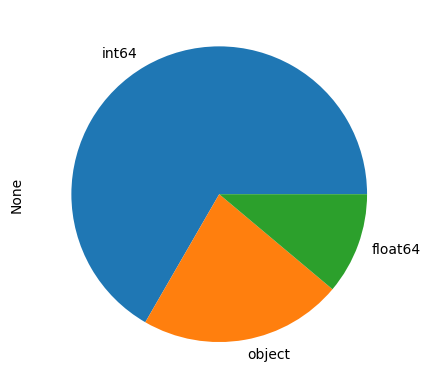

In [274]:
data.dtypes.value_counts().plot(kind="pie")

In [275]:
data_num = data.select_dtypes(include=["int64", "float64"])
data_num.head(1)

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,MoSold,SalePrice
0,1710,3,1,5,1995.0,2,208500


In [276]:
y = data_num["SalePrice"]
X_num = data[["GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "OverallCond", "RoofSurface", "MoSold"]]

In [277]:
linear_regression = LinearRegression()
score_pre_scaling = cross_val_score(estimator = linear_regression, X = X_num, y = y).mean()
score_pre_scaling

0.5726603017210607

Keep this score in mind! You will train a new model after data preprocessing in Challenge #2 - see if it improves your average score 😉

🚀 Now, back to **feature scaling**!

###  `RoofSurface` 

❓ **Question** about `RoofSurface` ❓

👇 Investigate `RoofSurface` for distribution and outliers. Then, choose the most appropriate scaling technique. Either:

1. Standard Scaler
2. Robust Scaler
3. MinMax Scaler

Replace the original columns with the transformed values.

<AxesSubplot:xlabel='RoofSurface', ylabel='Count'>

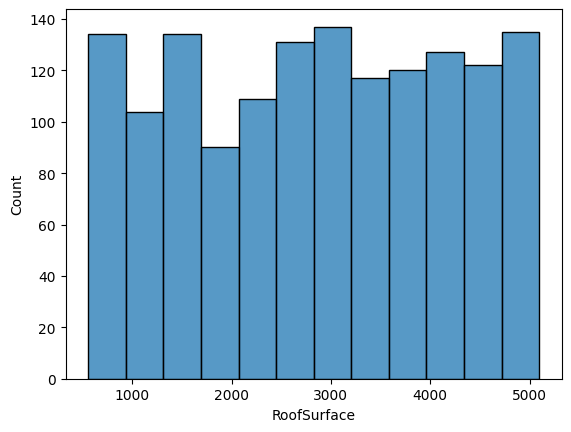

In [278]:
# Let's have a look at the distribution
sns.histplot(data = data, x = "RoofSurface")

A histplot shows that the data is pretty much uniformly distributed

<AxesSubplot:xlabel='RoofSurface'>

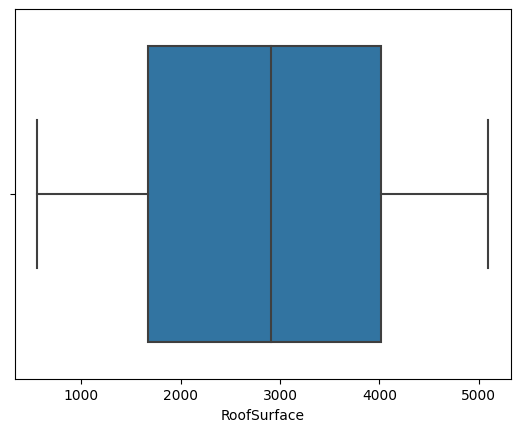

In [279]:
sns.boxplot(data = data, x = "RoofSurface")

And the boxenplot shows that there are no outliers.

<details>
    <summary>💡 <i>Hint</i></summary>
    
ℹ️ Since `RoofSurface` has neither a Gaussian distribution, nor outliers $\rightarrow$ MinMaxScaler.
</details>

In this case, we can use the MinMaxScaler.

In [280]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
min_max_scaler = MinMaxScaler()

# Fit the scaler on the data
min_max_scaler.fit(data[["RoofSurface"]])

# Transform the data
data["RoofSurface"] = min_max_scaler.transform(data[["RoofSurface"]])

data.head(1)

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,MoSold,SalePrice
0,1710,3,1,5,0.316729,RFn,Y,2,208500


### `GrLivArea`

❓ **Question** about `GrLivArea` ❓

👇 Investigate `GrLivArea` for distribution and outliers. Then, choose the most appropriate scaling technique. Either:

1. Standard Scaler
2. Robust Scaler
3. MinMax Scaler

Replace the original columns with the transformed values.

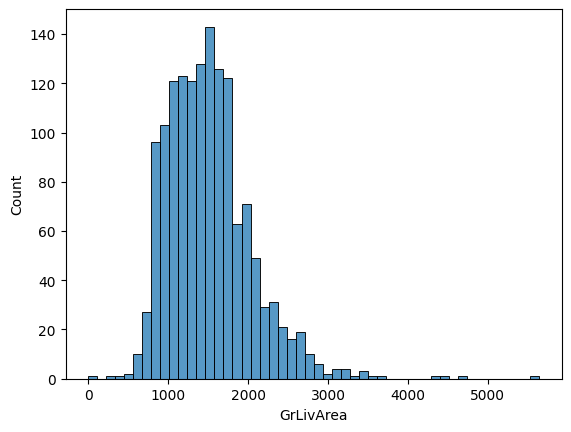

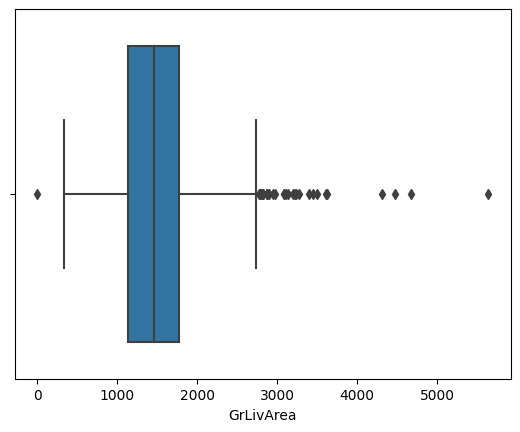

In [281]:
sns.histplot(data = data, x = "GrLivArea")
plt.show()
sns.boxplot(data = data, x = "GrLivArea")
plt.show()

Here we have a somewhat normal-like but positively skewed distribution, with outliers mainly on the positive end. It will be wise to use the robust scaler, which is less sensitive to outliers.

In [282]:
from sklearn.preprocessing import RobustScaler

# Initialize the scaler
robust_scaler = RobustScaler()

# Fit the scaler on the data
robust_scaler.fit(data[["GrLivArea"]])

# Transform the data
data["GrLivArea"] = robust_scaler.transform(data[["GrLivArea"]])

data.head(1)

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,MoSold,SalePrice
0,0.38007,3,1,5,0.316729,RFn,Y,2,208500


<details>
    <summary>💡 <i>Hint</i></summary>
    
ℹ️ `GrLivArea` has many outliers $\rightarrow$ RobustScaler()
</details>

### `BedroomAbvGr` ,  `OverallCond` & `KitchenAbvGr`

❓ **Questions** about `BedroomAbvGr`, `OverallCond` & `KitchenAbvGr` ❓

👇 Investigate `BedroomAbvGr`, `OverallCond` & `KitchenAbvGr`. Then, chose one of the following scaling techniques:

1. MinMax Scaler
2. Standard Scaler
3. Robust Scaler

Replace the original columns with the transformed values.

<details>
    <summary>💡 <i>Hint</i></summary>
    
ℹ️ `BedroomAbvGr` ,  `OverallCond` & `KitchenAbvGr` are ordinal features. There are less than 0.1% of outliers so no need to use _RobustScaler()_. The distribution is not Gaussian, hence no _StandardScaler()_. By elimination, you can confidently choose _MinMaxScaler()_.
</details>

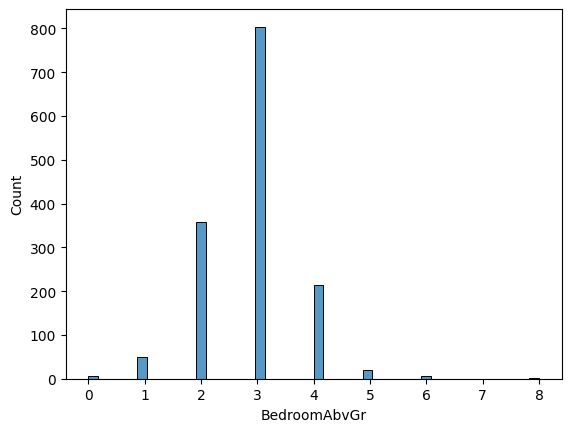

3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

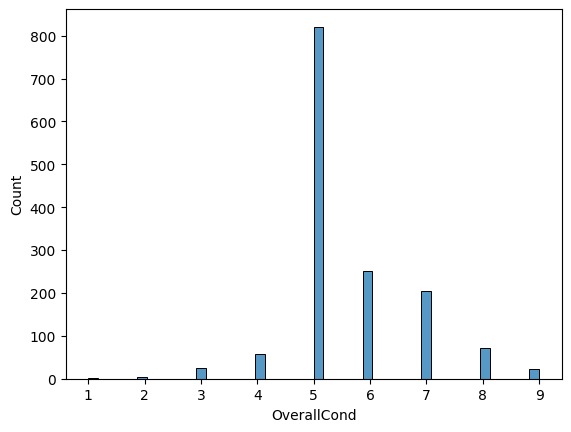

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

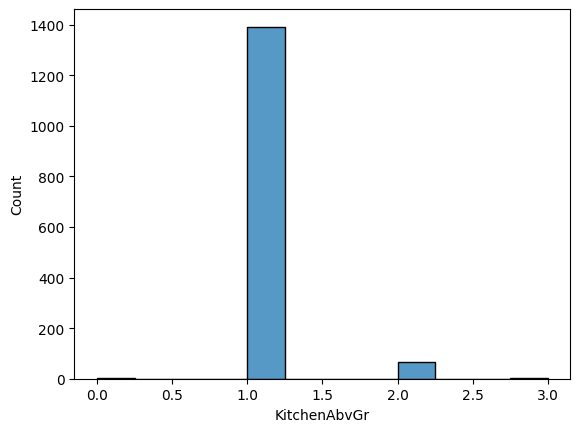

1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64

In [283]:
ordinal_cols = ["BedroomAbvGr", "OverallCond", "KitchenAbvGr"]
for name in ordinal_cols:
    sns.histplot(data = data, x = name)
    plt.show()
    display(data[name].value_counts())

In [284]:
data.describe()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,MoSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.078410,2.866438,1.046575,5.575342,0.508148,6.321918,180921.195890
std,0.813952,0.815778,0.220338,1.112799,0.291583,2.703626,79442.502883
min,-2.263422,0.000000,0.000000,1.000000,0.000000,1.000000,34900.000000
25%,-0.516802,2.000000,1.000000,5.000000,0.246143,5.000000,129975.000000
50%,0.000000,3.000000,1.000000,5.000000,0.517523,6.000000,163000.000000
75%,0.483198,3.000000,1.000000,6.000000,0.761406,8.000000,214000.000000
max,6.455002,8.000000,3.000000,9.000000,1.000000,12.000000,755000.000000


For these ordinal columns, the distributions are not normal and there are no outliers. We can use the MinMaxScaler.

In [285]:
# Initialize the scaler
min_max_scaler = MinMaxScaler()

# Fit the scaler on the data
min_max_scaler.fit(data[ordinal_cols])

# Transform the data
data[ordinal_cols] = min_max_scaler.transform(data[ordinal_cols])

data.head(1)

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,MoSold,SalePrice
0,0.38007,0.375,0.333333,0.5,0.316729,RFn,Y,2,208500


🧪 **Test your code**

In [286]:
from nbresult import ChallengeResult

result = ChallengeResult('scaling',
                         dataset = data
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/branchedelac/.pyenv/versions/3.10.6/envs/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/branchedelac/code/branchedelac/05-ML/02-Prepare-the-dataset/data-preprocessing-workflow/tests
plugins: anyio-3.6.2, asyncio-0.19.0, typeguard-2.13.3
asyncio: mode=strict
collecting ... collected 3 items

test_scaling.py::TestScaling::test_bedroom_kitchen_condition PASSED      [ 33%]
test_scaling.py::TestScaling::test_gr_liv_area PASSED                    [ 66%]
test_scaling.py::TestScaling::test_roof_surface PASSED                   [100%]

============================== 3 passed in 0.81s ===============================


💯 You can commit your code:

git add tests/scaling.pickle

git commit -m 'Completed scaling step'

git push origin master



## (4) Feature Encoding

### `GarageFinish`

❓ **Question** about `GarageFinish`❓

👇 Investigate `GarageFinish` and choose one of the following encoding techniques accordingly:
- Ordinal encoding
- One-Hot encoding

Add the encoding to the dataframe as new colum(s), and remove the original column.


<details>
    <summary>💡 <i>Hint</i></summary>
        
ℹ️ `GarageFinish` is a multicategorical feature that should be One-hot-encoded. You could also consider an Ordinal Encoding but we would have to know for sure that Unfinished or no garage are definitely worse that rough finished!
</details>

In [287]:
data["GarageFinish"].value_counts()

Unf         605
RFn         422
Fin         352
NoGarage     81
Name: GarageFinish, dtype: int64

This column has four purely nominal categorical values. Let's encode them using one-hot-encoding.

In [288]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the encoder
ohe_minus_one = OneHotEncoder(sparse_output = False)

# Fit the encoder on GarageFinish
ohe_minus_one.fit(data[["GarageFinish"]])

# Transform the data and add the new columns to the dataframe
data[ohe_minus_one.get_feature_names_out()] = ohe_minus_one.transform(data[["GarageFinish"]])

# Drop the original, non-encoded column
data.drop(columns = ["GarageFinish"], inplace = True)

data.head(2)

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,MoSold,SalePrice,GarageFinish_Fin,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf
0,0.38007,0.375,0.333333,0.500,0.316729,Y,2,208500,0.0,0.0,1.0,0.0
1,-0.31209,0.375,0.333333,0.875,0.069650,Y,5,181500,0.0,0.0,1.0,0.0


### Encoding  `CentralAir`

❓ **Question** about `CentralAir`❓

Investigate `CentralAir` and choose one of the following encoding techniques accordingly:
- Ordinal encoding
- One-Hot encoding

Replace the original column with the newly generated encoded columns.


<details>
    <summary>💡 <i>Hint</i></summary>
    
ℹ️ `CentralAir` is a binary categorical feature.
</details>

In [289]:
data["CentralAir"].value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

This is a binary nominal categorical feature. Let's use on-hot encoding again.

In [290]:
# Initialize the encoder
# Dropping the first sets one category as an implicit reference category
ohe_minus_one = OneHotEncoder(drop="if_binary", sparse_output = False)

# Fit the encoder on GarageFinish
ohe_minus_one.fit(data[["CentralAir"]])

# Transform the data and add the new columns to the dataframe
data["CentralAir"] = ohe_minus_one.transform(data[["CentralAir"]])


data.head(2)

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,MoSold,SalePrice,GarageFinish_Fin,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf
0,0.38007,0.375,0.333333,0.500,0.316729,1.0,2,208500,0.0,0.0,1.0,0.0
1,-0.31209,0.375,0.333333,0.875,0.069650,1.0,5,181500,0.0,0.0,1.0,0.0


## (5) Feature Engineering

### `MoSold` - Cyclical engineering 

👨🏻‍🏫 A feature can be numerical (continuous or discrete), categorical or ordinal. But a feature can also be temporal (e.g. quarters, months, days, minutes, ...). 

Cyclical features like time need some specific preprocessing. Indeed, if you want any Machine Learning algorithm to capture this cyclicity, your cyclical features must be preprocessed in a certain way.

👉 Consider the feature `MoSold`, the month on which the house was sold.

In [291]:
data["MoSold"].value_counts()

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64

* Many houses were sold in June (6), July (7) and May (5) (Spring/Summer)
* Only a few houses were sold in December (12), January (1) and February (2) (~ Fall/Winter)
    * But for any Machine Learning model, there is no reason why December (12) and January (1) would be "close"...

👩🏻‍🏫 ***How to deal with cyclical features?***

1.  Look at the following illustration and read the explanations to distinguish two different months.

<img src="https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/02-Prepare-the-dataset/cyclical_feature_engineering.png" alt="Cyclical features" width="1000">


2. Read this [article](https://ianlondon.github.io/blog/encoding-cyclical-features-24hour-time/) for more details.




❓ **Question** about `MoSold` ❓ 
- Create two new features `sin_MoSold` and `cos_MoSold` which correspond respectively to the sine and cosine of MoSold.
- Drop the original column `MoSold`

<details>
    <summary>💡 <i>Hint</i></summary>
    
To create a time engineered feature based on a column which gives the second in the day!
```python
seconds_in_day = 24*60*60

df['sin_time'] = np.sin(2*np.pi*df.seconds/seconds_in_day)
df['cos_time'] = np.cos(2*np.pi*df.seconds/seconds_in_day)
df.drop(columns=['seconds'], inplace=True)

df.head()
```


</details>

In [292]:
months_in_a_year = 12


data["sin_MoSold"] = np.sin(2*np.pi*(data["MoSold"]-1)/months_in_a_year)
data["cos_MoSold"] = np.cos(2*np.pi*(data["MoSold"]-1)/months_in_a_year)

data.drop(columns=["MoSold"], inplace=True)

🧪 **Test your code**

In [293]:
from nbresult import ChallengeResult

result = ChallengeResult('encoding', dataset = data, new_features = ['sin_MoSold', 'cos_MoSold'])

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/branchedelac/.pyenv/versions/3.10.6/envs/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/branchedelac/code/branchedelac/05-ML/02-Prepare-the-dataset/data-preprocessing-workflow/tests
plugins: anyio-3.6.2, asyncio-0.19.0, typeguard-2.13.3
asyncio: mode=strict
collecting ... collected 4 items

test_encoding.py::TestEncoding::test_central_air PASSED                  [ 25%]
test_encoding.py::TestEncoding::test_columns PASSED                      [ 50%]
test_encoding.py::TestEncoding::test_month_sold_features PASSED          [ 75%]
test_encoding.py::TestEncoding::test_month_sold_features_number PASSED   [100%]

============================== 4 passed in 0.70s ===============================


💯 You can commit your code:

git add tests/encoding.pickle

git commit -m 'Completed encoding step'

git push origin master



## (6) Export the preprocessed dataset

👇 Now that the dataset has been preprocessed, execute the code below to export it. You will keep working on it in the next exercise.

In [295]:
data.to_csv("data/clean_dataset.csv", index=False)

🏁 Congratulations! Now, you know how to ***preprocess a dataset*** !

💾 Don't forget to git add/commit/push your notebook...

🚀 ... and move on to the next challenge!